In [3]:
from pathlib import Path

import os 
os.environ["OMP_NUM_THREADS"] = "1" # This is done to set 
# OMP_NUM_THREADS to 1 for comparison of various k in 
# k-Means clustering.

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from pandas.plotting import parallel_coordinates

%matplotlib inline
import matplotlib.pylab as plt

Task 1(A)

In [4]:
# Create data frame for crime rates data set. 
rates_df = pd.read_csv('Crime(1).csv')

# Show the crime rates data frame dimensions.
print('Data Frame Dimensions: ', rates_df.shape)

Data Frame Dimensions:  (50, 8)


In [5]:
# To display the first 10 records of the rates_df data frame
rates_df.head(10)

,States,murder,rape,robbery,assault,burglary,larceny,auto
0,ALABAMA,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,ALASKA,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,ARIZONA,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,ARKANSAS,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,CALIFORNIA,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
5,COLORADO,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
6,CONNECTICUT,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
7,DELAWARE,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
8,FLORIDA,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4
9,GEORGIA,11.7,31.1,140.5,256.5,1351.1,2170.2,297.9


In [6]:
rates_df.set_index('States', inplace=True)
rates_df.head()

,murder,rape,robbery,assault,burglary,larceny,auto
States,,,,,,,
ALABAMA,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
ALASKA,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
ARIZONA,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
ARKANSAS,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
CALIFORNIA,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


Task 1(B)

In [7]:
# Pandas uses sample standard deviation; will apply in cluster analysis. 
rates_df_norm = (rates_df - rates_df.mean())/rates_df.std()
rates_df_norm_round = np.round((rates_df - rates_df.mean())/rates_df.std(), 
                          decimals=2)

# Display records of rates_df data frame.
print('Normalized Input Variables for 10 records')
rates_df_norm_round.head(10)

Normalized Input Variables for 10 records


,murder,rape,robbery,assault,burglary,larceny,auto
States,,,,,,,
ALABAMA,1.75,-0.05,-0.31,0.67,-0.36,-1.09,-0.50
ALASKA,0.87,2.40,-0.31,0.73,0.09,0.96,1.94
ARIZONA,0.53,0.79,0.16,1.01,2.44,2.47,0.32
ARKANSAS,0.35,0.17,-0.46,-0.08,-0.74,-1.11,-1.00
CALIFORNIA,1.05,2.20,1.84,1.46,1.96,1.14,1.48
COLORADO,-0.30,1.51,0.53,0.81,1.49,1.70,0.51
CONNECTICUT,-0.84,-0.83,0.06,-0.79,0.13,-0.07,1.12
DELAWARE,-0.37,-0.08,0.37,-0.17,0.90,1.39,0.46
FLORIDA,0.71,1.29,0.72,2.37,1.31,1.61,-0.14


Task 2(A)

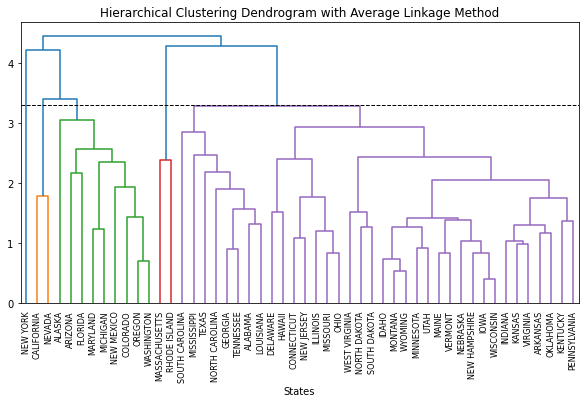

In [8]:
# Develop hierarchical (agglomerative) clustering using average 
# linkage (average distance) for clustering. 
hi_average = linkage(rates_df_norm, method='average')

# Develop plot parameters, title and labels.  
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram with Average Linkage Method')
plt.xlabel('States')

# Use dendrogram() function to develop hierarchical clustering deondrogram
# clusters with average linkage (average distance). 
# 'color_threshold = 3.3' represents the threthold of cluster development.
dendrogram(hi_average, labels=rates_df_norm.index, color_threshold= 3.3)

# Develop the horizontal line representing the cluster development
# threshold (3.3) and plot the dendrogram.
plt.axhline(y=3.3, color='black', linewidth=1.0, linestyle='dashed')
plt.show()

In [9]:
# Develop cluster membership for agglomerative clustering using average linkage method. 
memb_ave = fcluster(hi_average, 5, criterion='maxclust')
memb_ave = pd.Series(memb_ave, index=rates_df_norm.index)

# Display cluster memberships for 5 clusters.  
print('Cluster Membership for 5 Clusters Using Average Linkage Method')
for key, item in memb_ave.groupby(memb_ave):
    print(key, ' : ',' , '.join(item.index))




Cluster Membership for 5 Clusters Using Average Linkage Method
1  :  CALIFORNIA , NEVADA
2  :  ALASKA , ARIZONA , COLORADO , FLORIDA , MARYLAND , MICHIGAN , NEW MEXICO , OREGON , WASHINGTON
3  :  NEW YORK
4  :  MASSACHUSETTS , RHODE ISLAND
5  :  ALABAMA , ARKANSAS , CONNECTICUT , DELAWARE , GEORGIA , HAWAII , IDAHO , ILLINOIS , INDIANA , IOWA , KANSAS , KENTUCKY , LOUISIANA , MAINE , MINNESOTA , MISSISSIPPI , MISSOURI , MONTANA , NEBRASKA , NEW HAMPSHIRE , NEW JERSEY , NORTH CAROLINA , NORTH DAKOTA , OHIO , OKLAHOMA , PENNSYLVANIA , SOUTH CAROLINA , SOUTH DAKOTA , TENNESSEE , TEXAS , UTAH , VERMONT , VIRGINIA , WEST VIRGINIA , WISCONSIN , WYOMING


Task 2(B)

In [11]:
# Create data frame with normalized cluster means for each 
# cluster and each input variable (measurement). 
clust_mean_norm = rates_df_norm.groupby(memb_ave).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]

# Use display.precision to reduce the number of decimals to 3. 
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Normalized Means of Input Variables for Clusters with Average Linkage Method')
clust_mean_norm



Normalized Means of Input Variables for Clusters with Average Linkage Method


,murder,rape,robbery,assault,burglary,larceny,auto,Cluster
1,1.605,2.186,2.048,1.448,2.322,1.632,1.209,Cluster 1
2,0.147,1.323,0.466,1.025,0.881,1.190,0.348,Cluster 2
3,0.842,0.341,3.945,1.075,1.008,0.153,1.904,Cluster 3
4,-1.059,-0.937,0.042,0.050,0.506,-0.129,3.042,Cluster 4
5,-0.090,-0.410,-0.342,-0.369,-0.405,-0.385,-0.376,Cluster 5


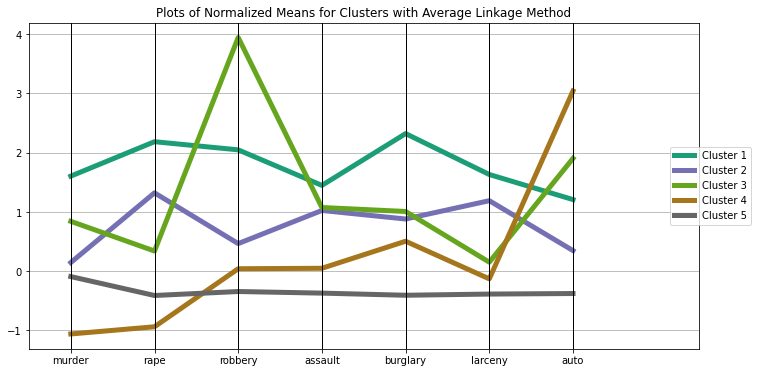

In [12]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Average Linkage Method')
plt.show()

Task 3(A)

In [14]:
# Use KMeans() function to create k-means clusters with k=6 (n_clusters=6). 
kmeans_6 = KMeans(n_clusters=6, random_state=0, n_init=1).fit(rates_df_norm)

# Develop cluster membership for k-means clusters, k=6.
memb_km6 = pd.Series(kmeans_6.labels_, index=rates_df_norm.index)


print()
for key, item in memb_km6.groupby(memb_km6):
    print(key, ': ', ', '.join(item.index))




0 :  IDAHO, IOWA, MAINE, MINNESOTA, MONTANA, NEBRASKA, NEW HAMPSHIRE, NORTH DAKOTA, PENNSYLVANIA, SOUTH DAKOTA, UTAH, VERMONT, WEST VIRGINIA, WISCONSIN, WYOMING
1 :  ARIZONA, CALIFORNIA, NEVADA
2 :  ALASKA, COLORADO, FLORIDA, MARYLAND, NEW MEXICO, OREGON, SOUTH CAROLINA, WASHINGTON
3 :  DELAWARE, HAWAII, ILLINOIS, MICHIGAN, MISSOURI, NEW JERSEY, NEW YORK, OHIO, TEXAS
4 :  CONNECTICUT, MASSACHUSETTS, RHODE ISLAND
5 :  ALABAMA, ARKANSAS, GEORGIA, INDIANA, KANSAS, KENTUCKY, LOUISIANA, MISSISSIPPI, NORTH CAROLINA, OKLAHOMA, TENNESSEE, VIRGINIA


Task 3(B)

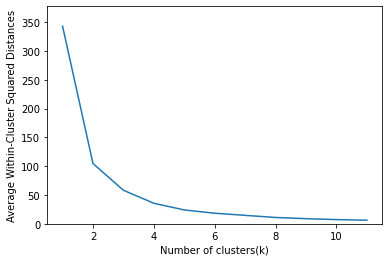

In [15]:
# Develop Elbow chart to identify appropriate k in k-Means
# clustering.

# Identify average with-cluster squred distances for k-Means 
# clusters, number of clusters k varies from 1 to 12. 
inertia = []
for n_clusters in range(1, 12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=1).fit(rates_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 12), 'inertia': inertia})

# Develop and display Elbow chart to compare average within-cluster 
# squared distances using k-Means clusters with number of clusters k 
# from 1 to 12. 
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()


Task 3(C)

In [16]:
# Create data frame with normalized cluster centroids for each 
# cluster and each input variable (measurement). 
centroids = pd.DataFrame(kmeans_6.cluster_centers_, 
                    columns=rates_df_norm.columns)

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('display.precision', 3)

print('Cluster Centroids for k-Means Clustering with k = 6')
centroids


Cluster Centroids for k-Means Clustering with k = 6


,murder,rape,robbery,assault,burglary,larceny,auto,Cluster
0,-1.011,-0.941,-0.855,-0.932,-0.902,-0.490,-0.646,Cluster 0
1,1.247,1.719,1.419,1.301,2.361,1.913,0.913,Cluster 1
2,0.183,1.321,0.284,1.290,0.713,0.889,0.158,Cluster 2
3,0.356,0.199,1.039,-0.036,0.482,0.491,0.613,Cluster 3
4,-0.985,-0.902,0.048,-0.231,0.379,-0.109,2.399,Cluster 4
5,0.810,-0.059,-0.266,0.064,-0.394,-0.800,-0.586,Cluster 5


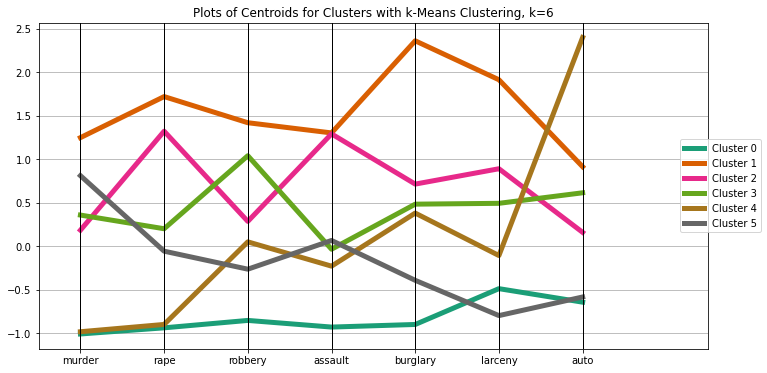

In [27]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='Cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Centroids for Clusters with k-Means Clustering, k=6')
plt.show()